Unique classes in y_train: [0]
Error: Target variable has only one class. Logistic Regression cannot be trained.
KNN Accuracy: 1.0
Decision Tree Accuracy: 1.0
Naive Bayes Accuracy: 1.0
Neural Network Accuracy: 1.0


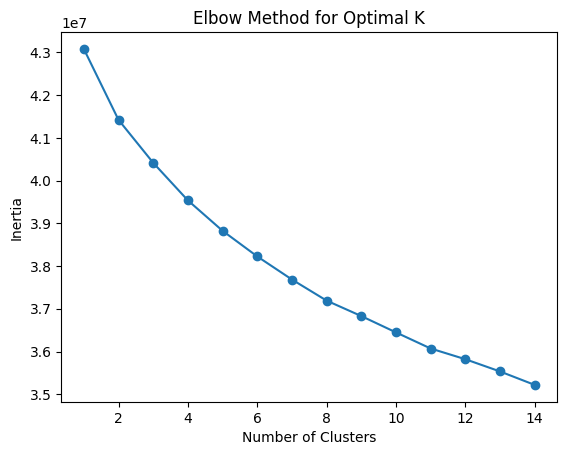

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load MNIST dataset
train_df = pd.read_csv("/content/mnist_train.csv")
test_df = pd.read_csv("/content/mnist_test.csv")

# Splitting into features and labels
X_train = train_df.iloc[:, 1:].values  # Features (pixel values)
y_train = train_df.iloc[:, 0].values   # Labels (digits)
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# Check for unique classes in y_train
unique_classes = np.unique(y_train)
print("Unique classes in y_train:", unique_classes)

# If only one class is present, handle the situation accordingly
if len(unique_classes) < 2:
    print("Error: Target variable has only one class. Logistic Regression cannot be trained.")
    # You might consider:
    # 1. Checking your data loading and preprocessing steps for errors.
    # 2. Collecting more data to ensure representation of all classes.
    # 3. Using a different algorithm suitable for single-class classification.
else:
    # Standardization
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    # Normalization
    normalizer = MinMaxScaler()
    X_train_norm = normalizer.fit_transform(X_train)
    X_test_norm = normalizer.transform(X_test)

    # Logistic Regression
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train_std, y_train)
    y_pred_log = log_reg.predict(X_test_std)
    print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)
y_pred_knn = knn.predict(X_test_std)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Decision Tree (ID3)
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Naive Bayes (Categorical)
nb = CategoricalNB(min_categories=256) # Setting min_categories to handle all possible pixel values (0-255)
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# Neural Network (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300)
mlp.fit(X_train_std, y_train)
y_pred_mlp = mlp.predict(X_test_std)
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_mlp))

# K-Means Clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train_std)
labels_kmeans = kmeans.predict(X_test_std)

# DBSCAN Clustering
dbscan = DBSCAN(eps=3, min_samples=10)
dbscan.fit(X_train_std)
labels_dbscan = dbscan.labels_

# Elbow Method for K-Means
inertia = []
k_range = range(1, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_std)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()
